In [1]:
import pandas as pd
from PIL import Image

#Razpredelnice za delo s podatki
slikarji = pd.read_csv('./csv-datoteke/seznam_slikarji.csv',sep=';',encoding='latin1',index_col='Id_slikarja')
slike = pd.read_csv('./csv-datoteke/seznam_slik.csv',sep=';',encoding='latin1',index_col='Id_slike')

#Število izpisov po stolpcih in vrsticah.
pd.options.display.max_rows = 15
pd.options.display.max_columns = 16

%matplotlib inline

import matplotlib.pyplot as plt
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
slikarji

,Ime,Narodnost,Obdobje
Id_slikarja,,,
1536,"GALLE, Cornelis",Flemish,1601-1650
412,"BLANCHARD, Pharamond",French,1801-1850
2607,MASTER of Citt? di Castello,Italian,1301-1350
2766,"MEUCCI, Vincenzo",Italian,1701-1750
3199,"PERRIN, Jean-Charles-Nicaise",French,1751-1800
3872,"SLAVÃ?EK, AntonÃ­n",Bohemian,1851-1900
3382,"PYNAS, Jan Symonsz.",Dutch,1601-1650
...,...,...,...
1980,"HOUASSE, Michel-Ange",French,1701-1750


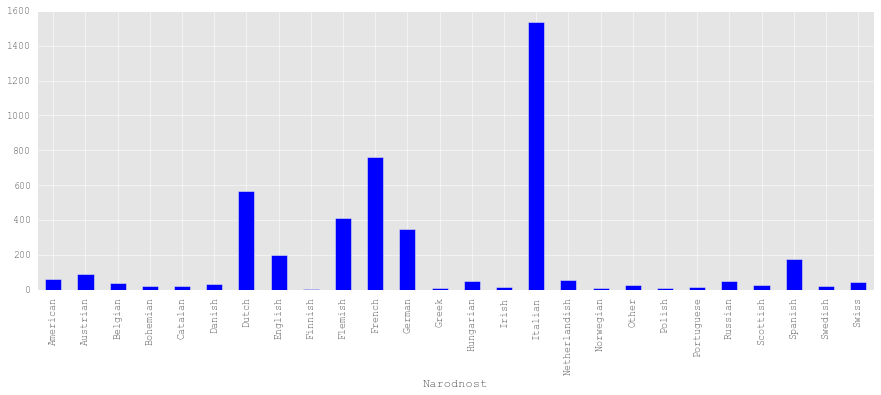

In [3]:
slikarji_po_narodnosti = slikarji.groupby('Narodnost').size()
slikarji_po_narodnosti.plot(color='b',kind='bar')

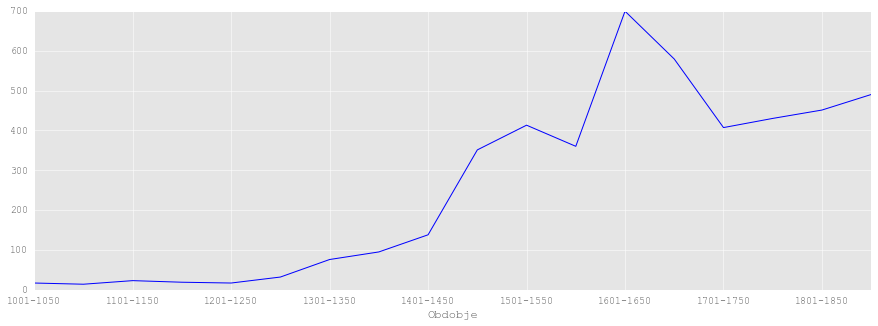

In [4]:
slikarji_po_obdobjih = slikarji.groupby('Obdobje').size()
slikarji_po_obdobjih.plot(color='b')

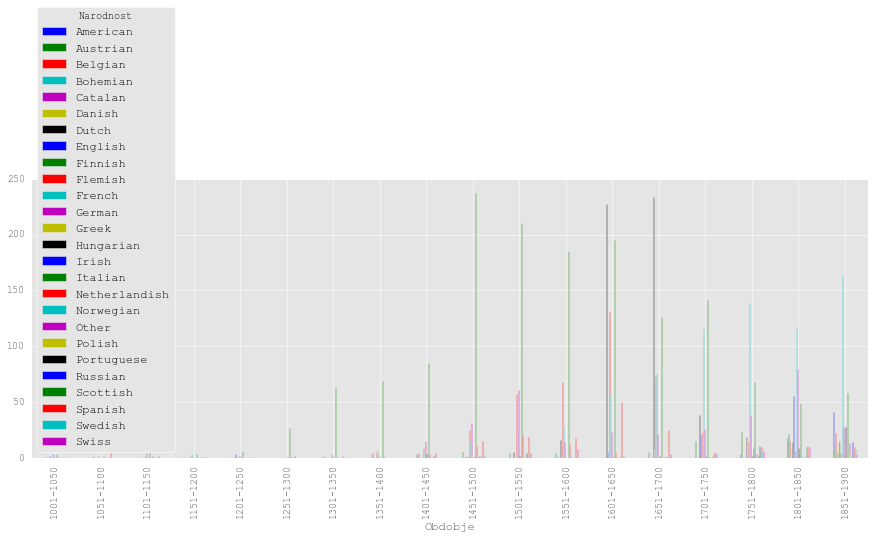

In [5]:
slikarji_glede_na_obdobje_po_narodnosti=slikarji.groupby(['Obdobje','Narodnost']).size().unstack()
slikarji_glede_na_obdobje_po_narodnosti.plot(kind='bar')

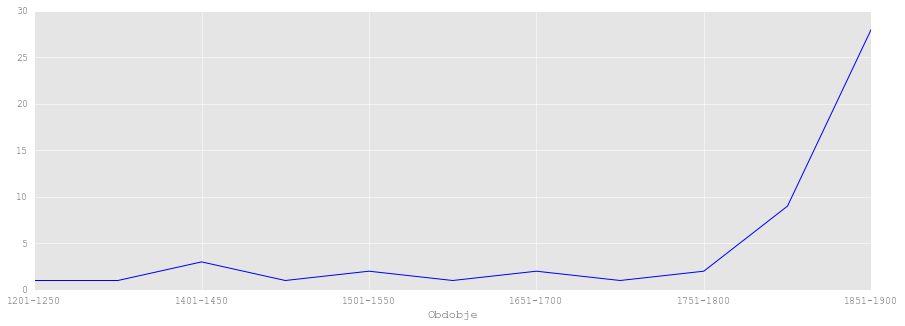

In [6]:
Narod = 'Hungarian'
Narod_slikarji=slikarji[slikarji.Narodnost==Narod]
stevilo_Narod_slikarjev_v_obdobju=Narod_slikarji.groupby('Obdobje').size()
stevilo_Narod_slikarjev_v_obdobju.plot(color='b')

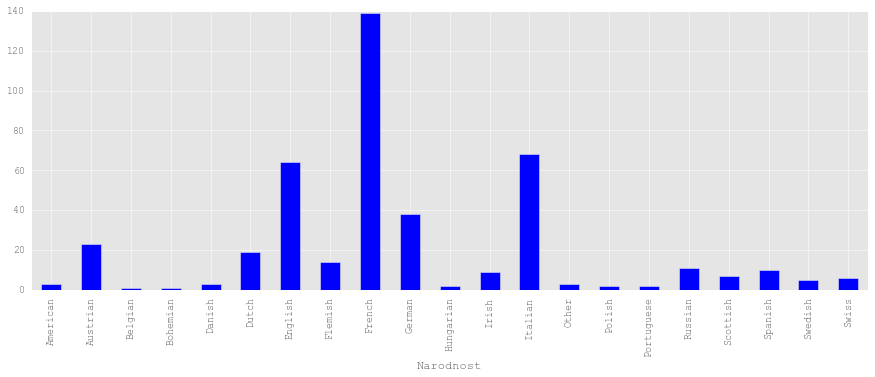

In [7]:
Obdobje='1751-1800'
Obdobje_slikarji=slikarji[slikarji.Obdobje==Obdobje]
stevilo_v_Obdobju_slikarjev_glede_na_narodnost=Obdobje_slikarji.groupby('Narodnost').size()
stevilo_v_Obdobju_slikarjev_glede_na_narodnost.plot(color='b',kind='bar')

In [8]:
slike

,Id_slikarja,Naslov,Tehnika,Lokacija,Oblika,Tip
Id_slike,,,,,,
24546,2886,Queen Mary Tudor of England,"Oil on panel, 109 x 84 cm","Museo del Prado, Madrid",painting,portrait
27321,3307,Hercules and Antaeus,"Tempera on wood, 16 x 9 cm","Galleria degli Uffizi, Florence",painting,mythological
21464,2622,Madonna and Child with Six Angels,"Tempera on wood, 65 x 43 cm","The Morgan Library and Museum, New York",painting,religious
34418,4085,Portrait of a Senator,"Oil on canvas, 119 x 100 cm","Museo Thyssen-Bornemisza, Madrid",painting,portrait
21569,2644,Laudario of the Compagnia di Sant'Agnese,"Tempera and gold on parchment, 430 x 317 mm",Private collection,illumination,religious
4826,619,View of the interior,Photo,"Cappella dei Pazzi, Santa Croce, Florence",architecture,interior
30303,3577,Apostles James the Great and Paul,Stone,"Abbey Church of Saint-Gilles, Saint-Gilles-du-...",sculpture,religious
...,...,...,...,...,...,...
37494,4353,The Triumph of Mordecai,"Oil on canvas, 500 x 370 cm","San Sebastiano, Venice",painting,mythological


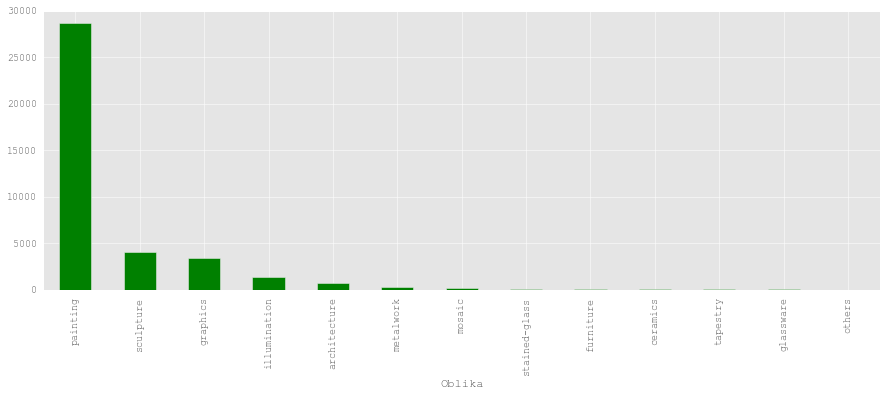

In [9]:
slike_oblika=slike.groupby('Oblika').size().sort_values(ascending=False)
slike_oblika.plot(kind='bar',color='g')

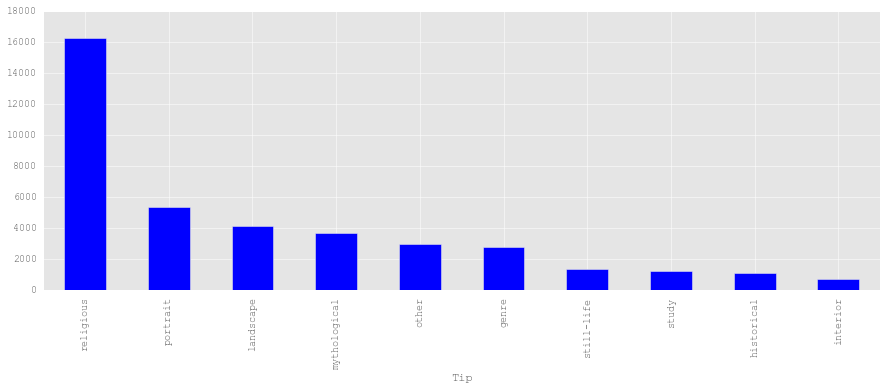

In [10]:
slike_tip=slike.groupby('Tip').size().sort_values(ascending=False)
slike_tip.plot(kind='bar',color='b')

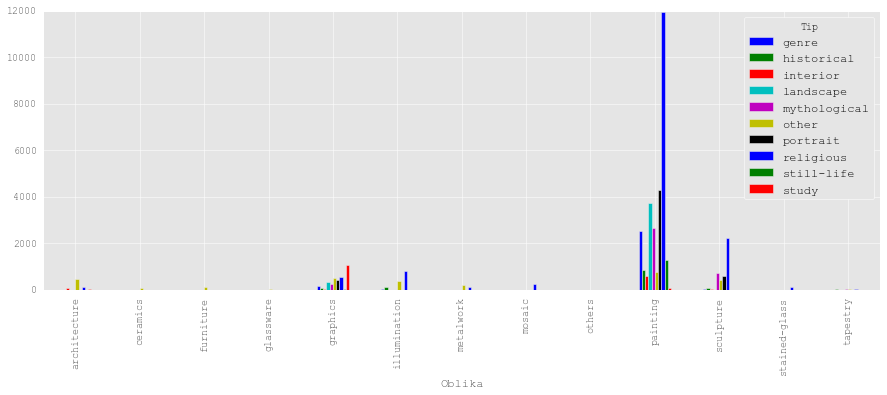

In [11]:
oblika_in_njen_tip=slike.groupby(['Oblika','Tip']).size().unstack()
oblika_in_njen_tip.plot(kind='bar')

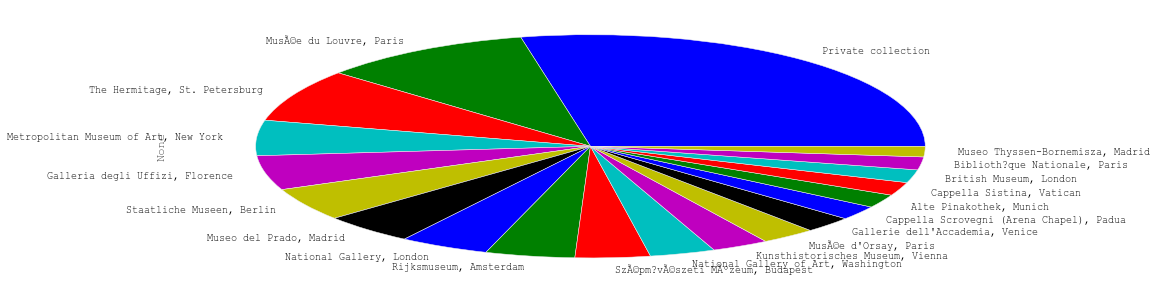

In [12]:
najvecje_zbirke_slike_lokacija=slike.groupby('Lokacija').size().sort_values(ascending=False).head(20)
najvecje_zbirke_slike_lokacija.plot(kind='pie')

In [13]:
zdruzeni_tabeli=slike.join(slikarji, on='Id_slikarja')
zdruzeni_tabeli

,Id_slikarja,Naslov,Tehnika,Lokacija,Oblika,Tip,Ime,Narodnost,Obdobje
Id_slike,,,,,,,,,
24546,2886,Queen Mary Tudor of England,"Oil on panel, 109 x 84 cm","Museo del Prado, Madrid",painting,portrait,"MORA, Bernardo de",Spanish,1651-1700
27321,3307,Hercules and Antaeus,"Tempera on wood, 16 x 9 cm","Galleria degli Uffizi, Florence",painting,mythological,"POLLAIUOLO, Piero del",Italian,1451-1500
21464,2622,Madonna and Child with Six Angels,"Tempera on wood, 65 x 43 cm","The Morgan Library and Museum, New York",painting,religious,MASTER of Saint Cecilia,Italian,1301-1350
34418,4085,Portrait of a Senator,"Oil on canvas, 119 x 100 cm","Museo Thyssen-Bornemisza, Madrid",painting,portrait,"TIRALI, Andrea",Italian,1651-1700
21569,2644,Laudario of the Compagnia di Sant'Agnese,"Tempera and gold on parchment, 430 x 317 mm",Private collection,illumination,religious,MASTER of the Dresden Prayer Book,Flemish,1451-1500
4826,619,View of the interior,Photo,"Cappella dei Pazzi, Santa Croce, Florence",architecture,interior,"BRUNI, Domenico",Italian,1601-1650
30303,3577,Apostles James the Great and Paul,Stone,"Abbey Church of Saint-Gilles, Saint-Gilles-du-...",sculpture,religious,"ROMANESQUE SCULPTOR, German",German,1101-1150
...,...,...,...,...,...,...,...,...,...
37494,4353,The Triumph of Mordecai,"Oil on canvas, 500 x 370 cm","San Sebastiano, Venice",painting,mythological,"VERROCCHIO, Andrea del",Italian,1451-1500


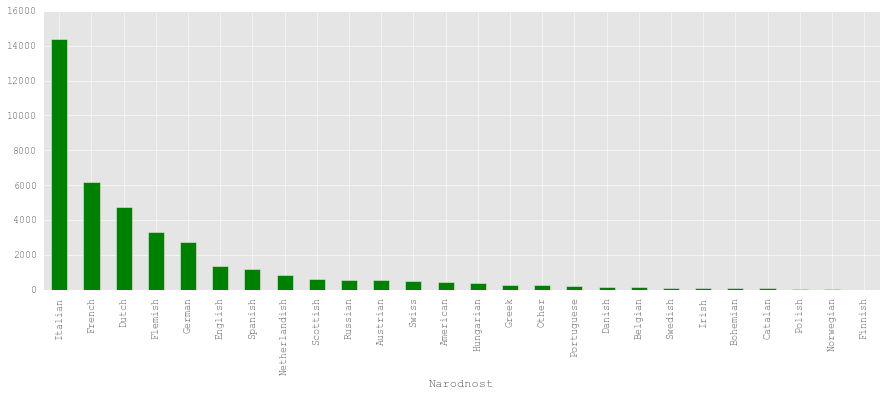

In [14]:
stevilo_narisanih_slik_narodnost=zdruzeni_tabeli.groupby('Narodnost')
stevilo_narisanih_slik_narodnost.size().sort_values(ascending=False).plot(kind='bar',color='g')

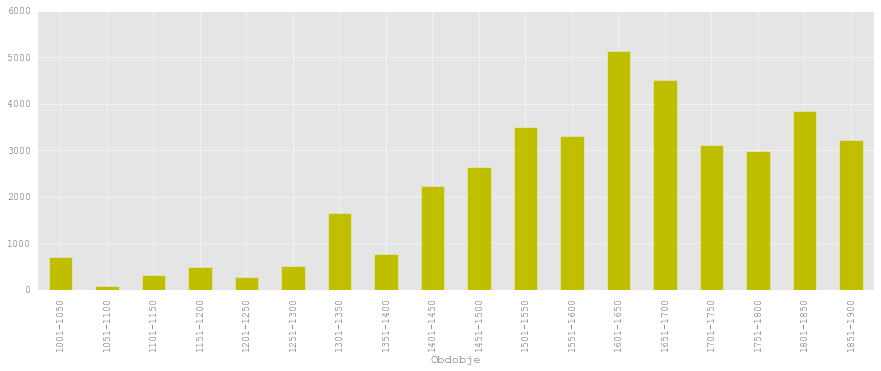

In [15]:
stevilo_narisanih_slik_obdobje=zdruzeni_tabeli.groupby('Obdobje')
stevilo_narisanih_slik_obdobje.size().plot(kind='bar',color='y')

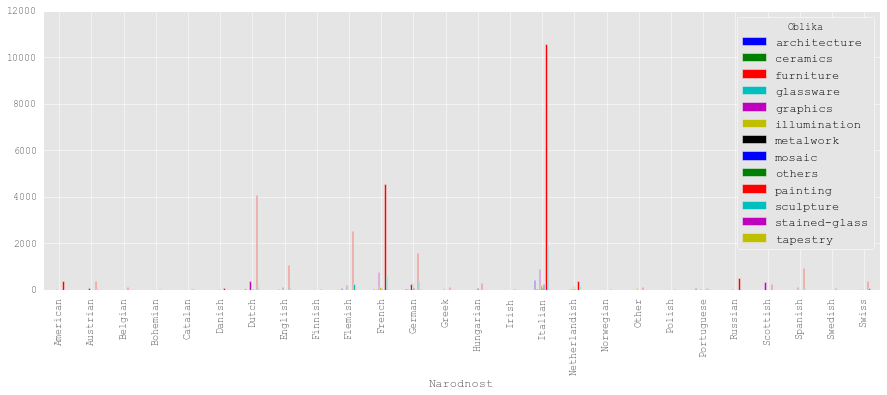

In [16]:
Oblika_glede_na_narodnost=zdruzeni_tabeli.groupby(['Narodnost','Oblika']).size()
Oblika_glede_na_narodnost.unstack().plot(kind='bar')

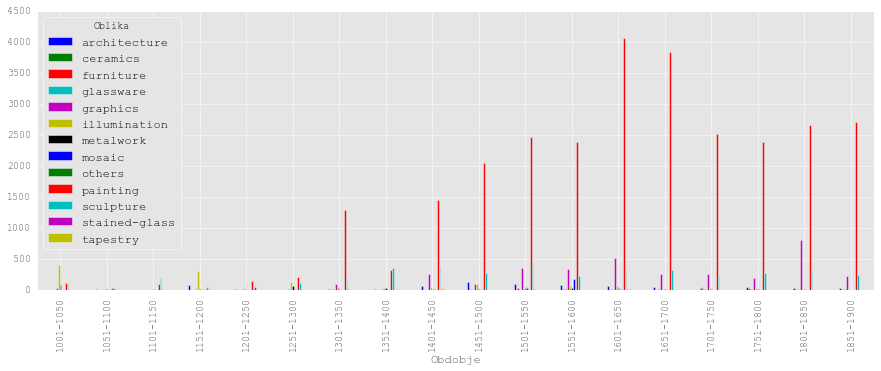

In [17]:
Oblika_glede_na_obdobje=zdruzeni_tabeli.groupby(['Obdobje','Oblika']).size()
Oblika_glede_na_obdobje.unstack().plot(kind='bar')

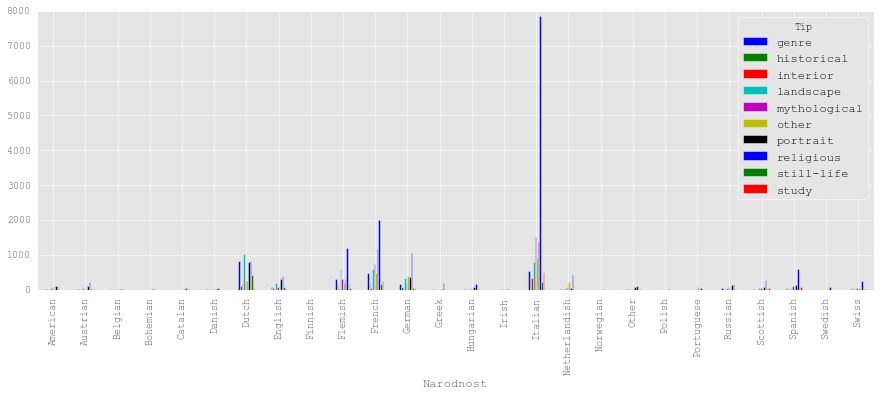

In [18]:
Tip_glede_na_narodnost=zdruzeni_tabeli.groupby(['Narodnost','Tip']).size()
Tip_glede_na_narodnost.unstack().plot(kind='bar')

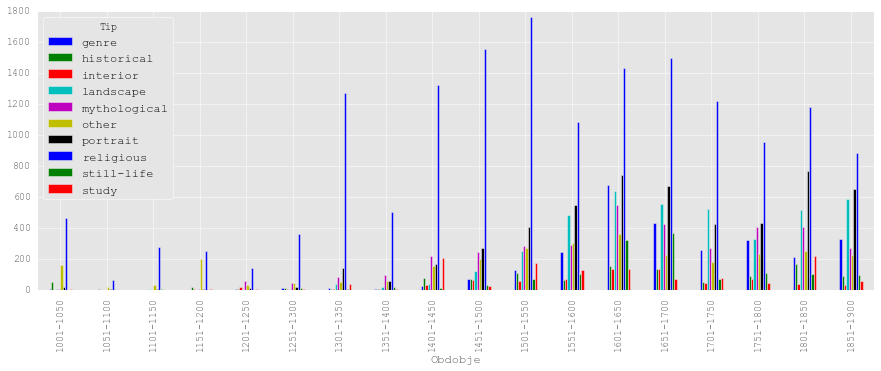

In [19]:
Tip_glede_na_obdobje=zdruzeni_tabeli.groupby(['Obdobje','Tip']).size()
Tip_glede_na_obdobje.unstack().plot(kind='bar')

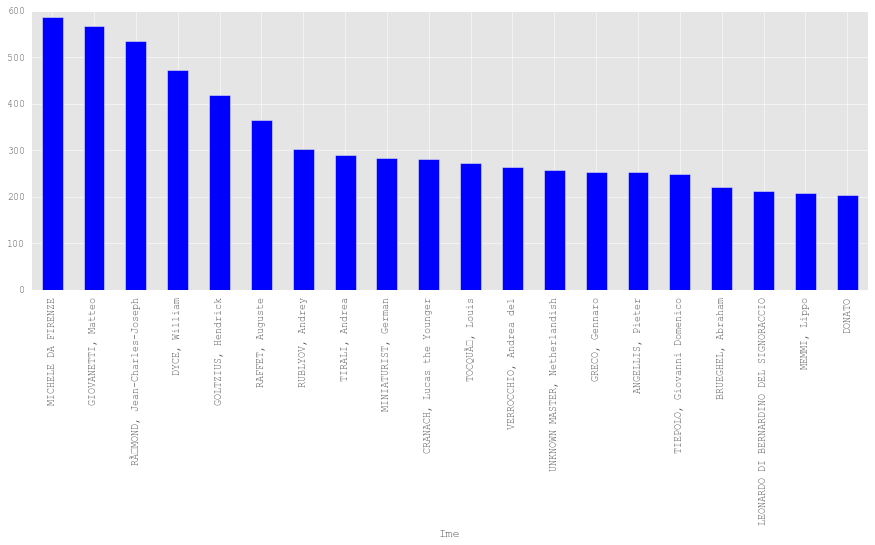

In [20]:
najvecje_stevilo_del=zdruzeni_tabeli.groupby('Ime')
najvecje_stevilo_del.size().sort_values(ascending=False).head(20).plot(kind='bar')

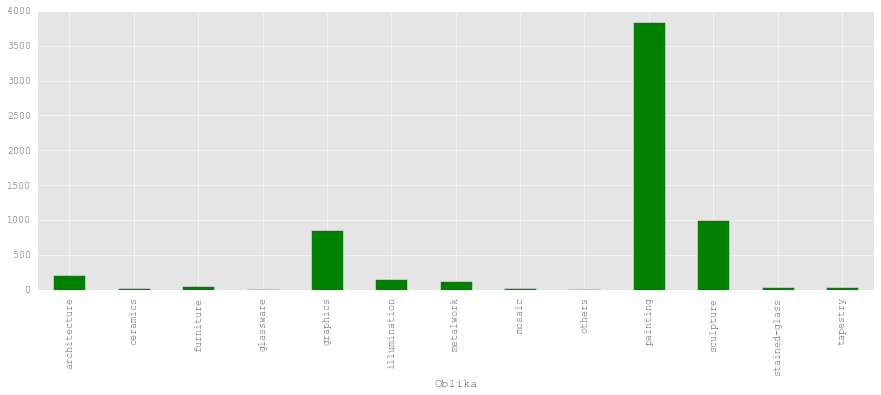

In [21]:
oblika_s_katero_so_se_ukvarjali=zdruzeni_tabeli.groupby(['Id_slikarja','Oblika']).count()
oblike=oblika_s_katero_so_se_ukvarjali.reset_index()[['Id_slikarja','Oblika']]
oblike.groupby('Oblika').size().plot(kind='bar',color='g')

In [22]:
NaslovS=''
TehnikaS='Oil on canvas'
LokacijaS=''
OblikaS='painting'
TipS='mythological'
NarodnostS1='French'
ObdobjeS1=''

sez1=[NaslovS,TehnikaS,LokacijaS,OblikaS,TipS,NarodnostS1,ObdobjeS1]
sez2=['Naslov','Tehnika','Lokacija','Oblika','Tip','Narodnost','Obdobje']

i=0
filtrirano=zdruzeni_tabeli
while i!=len(sez1):
    if sez1[i]!='':
        filtrirano=filtrirano.reset_index().set_index(sez2[i]).loc[sez1[i]].set_index('Id_slikarja')
    i+=1
zbrano=filtrirano.reset_index()
prikaz=zbrano.drop(['Id_slike','Id_slikarja'],axis=1)
prikaz

,Naslov,Lokacija,Ime,Obdobje
0,Erminia and the Shepherds,Private collection,"CLAUDEL, Camille",1851-1900
1,Bathsheba,"MusÃ©e du Louvre, Paris","DROUAIS, FranÃ§ois-Hubert",1701-1750
2,Sacred and Profane Love (detail),"Galleria Borghese, Rome","TOCQUÃ, Louis",1701-1750
3,Apollo Guarding the Herds of Admetus,Private collection,"CLAUDEL, Camille",1851-1900
4,Minerva in her Study (detail),"The Leiden Collection, New York","RÃMOND, Jean-Charles-Joseph",1801-1850
5,"Venus, Mars and Cupid","Pinacoteca Estense, Modena","GUÃRIN, Jean-Urbain",1751-1800
6,Venus and Adonis (detail),"Museo del Prado, Madrid","TOCQUÃ, Louis",1701-1750
...,...,...,...,...
43,Sacred and Profane Love (detail),"Galleria Borghese, Rome","TOCQUÃ, Louis",1701-1750
44,DanaÃ« (detail),"The Hermitage, St. Petersburg","RÃMOND, Jean-Charles-Joseph",1801-1850


In [23]:
#Vnesi index slike:
j=0

index_slikarja=zbrano.Id_slikarja.iloc[j]
index_slike=zbrano.Id_slike.iloc[j]

img=Image.open('podatki/seznam_slik/'+str(index_slikarja)+'/'+str(index_slike)+'.jpg')
img.show()

In [24]:
ImeS=''
NarodnostS='Italian'
ObdobjeS=''

sez1s=[ImeS,NarodnostS,ObdobjeS]
sez2s=['Ime','Narodnost','Obdobje']

i=0
filtrirano2=slikarji
while i!=len(sez1s):
    if sez1s[i]!='':
        filtrirano2=filtrirano2.reset_index().set_index(sez2s[i]).loc[sez1s[i]].set_index('Id_slikarja')
    i+=1
zbrano2=filtrirano2
prikaz2=zbrano2.reset_index().drop(['Id_slikarja'],axis=1)
prikaz2

,Ime,Obdobje
0,MASTER of Citt? di Castello,1301-1350
1,"MEUCCI, Vincenzo",1701-1750
2,"ORIOLI, Pietro di Francesco degli",1451-1500
3,"FREDIANI, Vincenzo di Antonio",1451-1500
4,"GUIDOBONO, Bartolomeo",1651-1700
5,PACECCO,1601-1650
6,"TIEPOLO, Giovanni Battista",1701-1750
...,...,...
1526,MASTER of Bigallo,1201-1250
1527,"BARBIERI, Paolo Antonio",1601-1650


In [25]:
#Vnesi index slikarja:
k=0
najdi_slike_po_tem_indexu=zbrano2.reset_index().Id_slikarja.iloc[k]
najdi_slike_po_tem_indexu

najdeni=slike.join(zbrano2, on='Id_slikarja')
poiskano=najdeni.dropna()
najdene_slike_slikarja=poiskano[poiskano.Id_slikarja==najdi_slike_po_tem_indexu].reset_index()
najdene_slike_slikarja
prikaz3=najdene_slike_slikarja.drop(['Id_slike','Id_slikarja'],axis=1)
prikaz3

,Naslov,Tehnika,Lokacija,Oblika,Tip,Ime,Obdobje
0,Group of capitals,Stone,"L'Assomption-de-Notre-Dame, Rieux-Minervois",sculpture,religious,MASTER of Citt? di Castello,1301-1350
1,Crucifixion with the Virgin and St John the Ev...,"Tempera on panel, gold ground, 39 x 35 cm",Private collection,painting,religious,MASTER of Citt? di Castello,1301-1350
2,Sculptured column,Marble,"Museo di Arte Sacra, San Casciano Val di Pesa",sculpture,religious,MASTER of Citt? di Castello,1301-1350
3,Male Head,"Marble, height 31 cm","Mateu collection, Perelada Castle",sculpture,other,MASTER of Citt? di Castello,1301-1350
4,Christ Walking on the Water,"White marble, 82 x 61 cm","Museu Frederic Mar?s, Barcelona",sculpture,religious,MASTER of Citt? di Castello,1301-1350
5,The Death and Martyrdom of St Saturninus (detail),Marble,"Benedictine Abbey, Saint-Hilaire-d'Aude",sculpture,religious,MASTER of Citt? di Castello,1301-1350
6,Martyrdom of St Saturninus of Toulouse,White marble,"Benedictine Abbey, Saint-Hilaire-d'Aude",sculpture,religious,MASTER of Citt? di Castello,1301-1350


In [26]:
#Vnesi index slike slikarja:
l=0

index_slikarja=najdene_slike_slikarja.Id_slikarja.iloc[l]
index_slike=najdene_slike_slikarja.Id_slike.iloc[l]

img=Image.open('podatki/seznam_slik/'+str(index_slikarja)+'/'+str(index_slike)+'.jpg')
img.show()